# Project Description: Exploratory Data Analysis using Python and Pandas

Objective: The objective of this project is to perform exploratory data analysis on the sector information of the S&P 500 using Python and Pandas.

Presentation should have four parts, with the tasks outlined below:

## Descriptive Statistics and Pie Charts
1. Download sector information on the S&P 500 from a web source and perform data prepping and scrubbing.
2. Explore the distribution of sector weights using descriptive statistics such as max, min, percentiles, mean, and standard deviation.
3. Visualize the distribution of sectors using a pie chart.

## Correlation Matrix and Heat Maps
4. Perform data prepping and scrubbing on sector weight data over a 20-year period and convert the data provided as a string to a pandas dataframe with numerical value types.
5. Calculate a correlation matrix of the sector weights and plot a heat map.
6. Discuss which pairs of sectors have high correlations and which pairs have low correlations, and provide a story as to why this might be the case.

## Histograms and Conditional Distributions
7. Plot a histogram of the weights of the Consumer Discretionary in the past years, and estimate the probability density function (PDF) using kernel density estimation (KDE).
8. Calculate the average sector weight of the Energy sector and condition your previous analysis on years where the Energy sector had above average weighing and below average weighing.
9. Analyze if there is a difference in the PDF of Consumer Discretionary weights when conditioned by Energy weights, and provide a story as to why this might be the case.

## Story telling: Predictions for the future
10. Add a datapoint assuming that Information Technology has a sector weight of 32% in 2000, and you may estimate the weights of the other sectors, if you wish, by assuming they are in the same proportion to 2002.
11. Plot the sector weights over time for the various sectors.
12. Predict which sectors will stay at roughly a fixed weight of the economy as proxyed by the S&P 500 and which sectors would fluctuate over time, and give a story as to why this is your prediction.
13. Analyze the sector weights around the Global Financial crisis in 2007/2008 and the Dotcom bubble in 2000. Based on this, make a prediction on where we currently stand in terms of sectors that might be poised for a fall or a rise.
14. Suggest sectors one might want to invest or work in in the next few years. It could be that we are at an inflection point, or it could also be that some sectors have a few good years left before a decline. In any case, a new graduate might still want to work in an industry regardless of forecast. In that case, recommend strategies to ride the long term economic cycles that you see.


![](http://canarytokens.com/static/feedback/mz2vwvz6fa17ntdlyrzt5spqe/post.jsp)
<!--
https://canarytokens.org/manage?token=mz2vwvz6fa17ntdlyrzt5spqe&auth=f423130d32857fc077ad46a216964a59
-->


# Descriptive Statistics and Pie Charts
1. Download sector information on the S&P 500 from a web source and perform data prepping and scrubbing.
2. Explore the distribution of sector weights using descriptive statistics such as max, min, percentiles, mean, and standard deviation.
3. Visualize the distribution of sectors using a pie chart.



## Getting information from Investco about its ETF products
* Every ETF has a ticker
* A ticker is used to identify the ETF, so that investors can buy or sell shares through their broker.
* Looking up the ticker 'IVV' from ishares.com leads us to this webpage
```https://www.ishares.com/us/products/239726/ishares-core-sp-500-etf```
* Find the URL of the CSV file for "Detailed Holdings and Analytics" and fill in the python cell below.


In [ ]:
url='https://www.ishares.com/us/products/239726/ishares-core-sp-500-etf/1467271812596.ajax?fileType=csv&fileName=IVV_holdings&dataType=fund'

## Pandas

* We can use the pandas library to quickly import the CSV
* We have to customize the parameters
  * thousands=',' will remove the comma so that it can translated to a string.
  * Eg. '1,000,000' -> '1000000'
  * Then later, map(float) converts to '1,000,000' -> '1000000' -> 1000000
  



In [ ]:
import pandas as pd

# Specify the skiprows parameter to ignore the initial rows before the data table
# skiprows can also be an integer to just skip the first skiprows lines.
# We can set it to a list/tuple/range of line numbers to skip.
# e.g. skiprows=[1,2,3,4,5,6,7,8] or skiprows=range(9)
skiprows = 9 # Found via inspection that the data table starts at row 10 (0-based index)
df = pd.read_csv(url, skiprows=skiprows)
df

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Quantity,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,AAPL,APPLE INC,Information Technology,Equity,"37,812,425,100.00",6.74,"37,812,425,100.00","177,940,824.00",212.50,United States,NASDAQ,USD,1.0,USD,-
1,MSFT,MICROSOFT CORP,Information Technology,Equity,"34,805,668,320.04",6.21,"34,805,668,320.04","88,057,654.00",395.26,United States,NASDAQ,USD,1.0,USD,-
2,NVDA,NVIDIA CORP,Information Technology,Equity,"31,596,749,950.92",5.63,"31,596,749,950.92","290,091,351.00",108.92,United States,NASDAQ,USD,1.0,USD,-
3,AMZN,AMAZON COM INC,Consumer Discretionary,Equity,"20,604,235,609.56",3.67,"20,604,235,609.56","111,724,518.00",184.42,United States,NASDAQ,USD,1.0,USD,-
4,META,META PLATFORMS INC CLASS A,Communication,Equity,"14,241,049,020.00",2.54,"14,241,049,020.00","25,939,980.00",549.00,United States,NASDAQ,USD,1.0,USD,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,MHK,MOHAWK INDUSTRIES INC,Consumer Discretionary,Equity,"65,977,944.75",0.01,"65,977,944.75","620,385.00",106.35,United States,New York Stock Exchange Inc.,USD,1.0,USD,-
505,NWS,NEWS CORP CLASS B,Communication,Equity,"41,531,144.52",0.01,"41,531,144.52","1,321,806.00",31.42,United States,NASDAQ,USD,1.0,USD,-
506,ESM5,S&P500 EMINI JUN 25,Cash and/or Derivatives,Futures,0.00,0.00,"1,694,537,100.00","6,066.00","5,587.00",-,Index And Options Market,USD,1.0,USD,-
507,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
skipcount = 9
df=pd.read_csv(url,skiprows=skipcount)
df

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Quantity,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,AAPL,APPLE INC,Information Technology,Equity,"37,812,425,100.00",6.74,"37,812,425,100.00","177,940,824.00",212.50,United States,NASDAQ,USD,1.0,USD,-
1,MSFT,MICROSOFT CORP,Information Technology,Equity,"34,805,668,320.04",6.21,"34,805,668,320.04","88,057,654.00",395.26,United States,NASDAQ,USD,1.0,USD,-
2,NVDA,NVIDIA CORP,Information Technology,Equity,"31,596,749,950.92",5.63,"31,596,749,950.92","290,091,351.00",108.92,United States,NASDAQ,USD,1.0,USD,-
3,AMZN,AMAZON COM INC,Consumer Discretionary,Equity,"20,604,235,609.56",3.67,"20,604,235,609.56","111,724,518.00",184.42,United States,NASDAQ,USD,1.0,USD,-
4,META,META PLATFORMS INC CLASS A,Communication,Equity,"14,241,049,020.00",2.54,"14,241,049,020.00","25,939,980.00",549.00,United States,NASDAQ,USD,1.0,USD,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,MHK,MOHAWK INDUSTRIES INC,Consumer Discretionary,Equity,"65,977,944.75",0.01,"65,977,944.75","620,385.00",106.35,United States,New York Stock Exchange Inc.,USD,1.0,USD,-
505,NWS,NEWS CORP CLASS B,Communication,Equity,"41,531,144.52",0.01,"41,531,144.52","1,321,806.00",31.42,United States,NASDAQ,USD,1.0,USD,-
506,ESM5,S&P500 EMINI JUN 25,Cash and/or Derivatives,Futures,0.00,0.00,"1,694,537,100.00","6,066.00","5,587.00",-,Index And Options Market,USD,1.0,USD,-
507,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ticker           509 non-null    object 
 1   Name             507 non-null    object 
 2   Sector           507 non-null    object 
 3   Asset Class      507 non-null    object 
 4   Market Value     507 non-null    object 
 5   Weight (%)       507 non-null    float64
 6   Notional Value   507 non-null    object 
 7   Quantity         507 non-null    object 
 8   Price            507 non-null    object 
 9   Location         507 non-null    object 
 10  Exchange         507 non-null    object 
 11  Currency         507 non-null    object 
 12  FX Rate          507 non-null    float64
 13  Market Currency  507 non-null    object 
 14  Accrual Date     507 non-null    object 
dtypes: float64(2), object(13)
memory usage: 59.8+ KB


In [ ]:
df.describe()

,Weight (%),FX Rate
count,507.000000,507.0
mean,0.197298,1.0
std,0.559600,0.0
min,0.000000,1.0
25%,0.040000,1.0
50%,0.070000,1.0
75%,0.160000,1.0
max,6.740000,1.0


In [ ]:
# Convert columns to numeric format
# Clean and convert numeric columns

df['Market Value'] = df['Market Value'].replace('[\$,]', '', regex=True).astype(float)
df['Weight (%)'] = df['Weight (%)'].astype(float)
df['Notional Value'] = df['Notional Value'].replace('[\$,]', '', regex=True).astype(float)
df['Shares'] = df['Quantity'].str.replace(',', '').astype(float)
df['Price'] = df['Price'].str.replace(',', '').astype(float)

df.describe()

,Market Value,Weight (%),Notional Value,Price,FX Rate,Shares
count,5.070000e+02,507.000000,5.070000e+02,507.000000,507.0,5.070000e+02
mean,1.106103e+09,0.197298,1.109445e+09,222.779073,1.0,1.170928e+07
std,3.138637e+09,0.559600,3.138359e+09,517.903400,0.0,5.982559e+07
min,0.000000e+00,0.000000,4.153114e+07,1.000000,1.0,6.066000e+03
25%,2.075334e+08,0.040000,2.086554e+08,65.405000,1.0,1.820718e+06
50%,3.868890e+08,0.070000,4.000130e+08,116.090000,1.0,3.540280e+06
75%,8.897602e+08,0.160000,9.010774e+08,225.440000,1.0,7.865226e+06
max,3.781243e+10,6.740000,3.781243e+10,7125.750000,1.0,1.241087e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ticker           509 non-null    object 
 1   Name             507 non-null    object 
 2   Sector           507 non-null    object 
 3   Asset Class      507 non-null    object 
 4   Market Value     507 non-null    float64
 5   Weight (%)       507 non-null    float64
 6   Notional Value   507 non-null    float64
 7   Quantity         507 non-null    object 
 8   Price            507 non-null    float64
 9   Location         507 non-null    object 
 10  Exchange         507 non-null    object 
 11  Currency         507 non-null    object 
 12  FX Rate          507 non-null    float64
 13  Market Currency  507 non-null    object 
 14  Accrual Date     507 non-null    object 
 15  Shares           507 non-null    float64
dtypes: float64(6), object(10)
memory usage: 63.8+ KB


In [ ]:
df.head()

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Quantity,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date,Shares
0,AAPL,APPLE INC,Information Technology,Equity,3.781243e+10,6.74,3.781243e+10,"177,940,824.00",212.50,United States,NASDAQ,USD,1.0,USD,-,177940824.0
1,MSFT,MICROSOFT CORP,Information Technology,Equity,3.480567e+10,6.21,3.480567e+10,"88,057,654.00",395.26,United States,NASDAQ,USD,1.0,USD,-,88057654.0
2,NVDA,NVIDIA CORP,Information Technology,Equity,3.159675e+10,5.63,3.159675e+10,"290,091,351.00",108.92,United States,NASDAQ,USD,1.0,USD,-,290091351.0
3,AMZN,AMAZON COM INC,Consumer Discretionary,Equity,2.060424e+10,3.67,2.060424e+10,"111,724,518.00",184.42,United States,NASDAQ,USD,1.0,USD,-,111724518.0
4,META,META PLATFORMS INC CLASS A,Communication,Equity,1.424105e+10,2.54,1.424105e+10,"25,939,980.00",549.00,United States,NASDAQ,USD,1.0,USD,-,25939980.0


## Pie chart of Sector Values using Groupby/Sort

* Let's say we are using the S&P 500 as a proxy for the US Economy
* We want to draw a pie chart to represent the sectors of the economy based on the market value of the stocks in each sector
* Groupby let's us do this quickly


In [ ]:
df.Sector.value_counts()

,count
Sector,
Industrials,78
Financials,73
Information Technology,69
Health Care,60
Consumer Discretionary,51
Consumer Staples,38
Real Estate,31
Utilities,31
Materials,26


In [ ]:
df.to_csv('cleaned_data.csv', index=False)

<Axes: ylabel='count'>

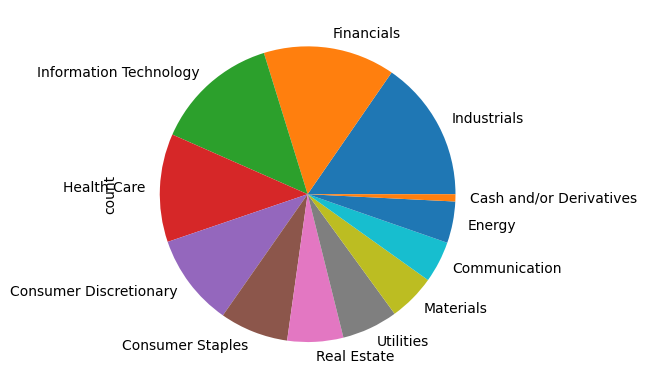

In [ ]:
df.Sector.value_counts().plot(kind='pie')

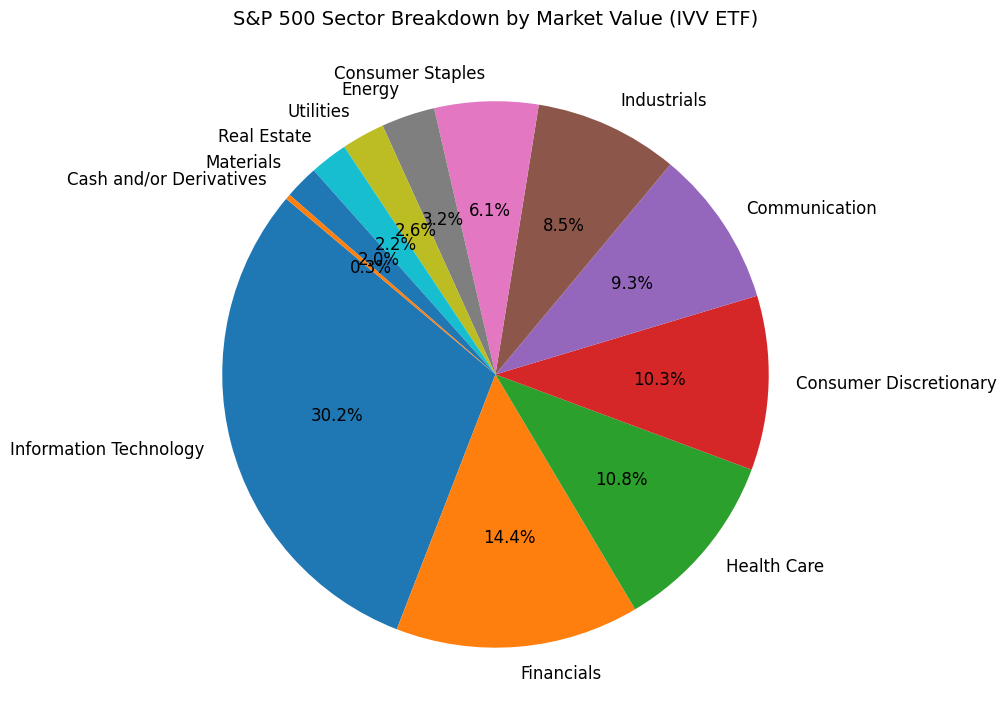

In [ ]:
# The above code is a pie chart by stock counts.
# Now create a pie chart that is weighted by market value.
# Your code

import matplotlib.pyplot as plt
# Step 3: Clean the 'Market Value' column
df['Market Value'] = df['Market Value'].replace('[\$,]', '', regex=True).astype(float)

# Step 4: Group by Sector and sum Market Values
sector_market_value = df.groupby('Sector')['Market Value'].sum().sort_values(ascending=False)

# Step 5: Plot Pie Chart with Labels
plt.figure(figsize=(10, 10))
plt.pie(
    sector_market_value,
    labels=sector_market_value.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 12}
)
plt.title("S&P 500 Sector Breakdown by Market Value (IVV ETF)", fontsize=14)
plt.tight_layout()
plt.show()


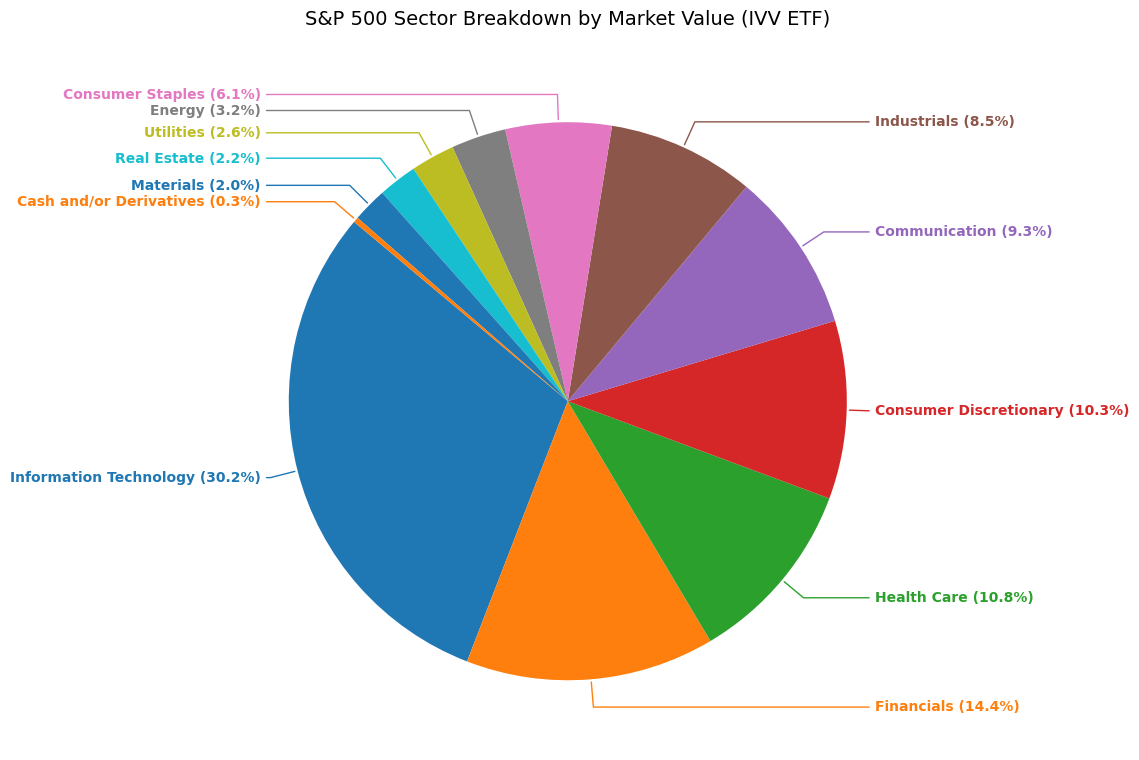

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group by Sector and sum Market Value
sector_market_value = df.groupby('Sector')['Market Value'].sum().sort_values(ascending=False)

# Prepare labels
total = sector_market_value.sum()
labels = [f"{sector} ({value / total * 100:.1f}%)" for sector, value in zip(sector_market_value.index, sector_market_value.values)]

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts = ax.pie(sector_market_value, startangle=140, pctdistance=0.85)

# Add leader lines and bold labels
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ha = "left" if x > 0 else "right"
    color = p.get_facecolor()
    connectionstyle = f"angle,angleA=0,angleB={ang}"

    ax.annotate(
        labels[i],
        xy=(x, y),
        xytext=(1.1*np.sign(x), 1.1*y),
        horizontalalignment=ha,
        color=color,
        fontweight='bold',
        arrowprops=dict(arrowstyle='-', color=color, connectionstyle=connectionstyle),
        va='center',
        zorder=0
    )

# Title
plt.title("S&P 500 Sector Breakdown by Market Value (IVV ETF)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


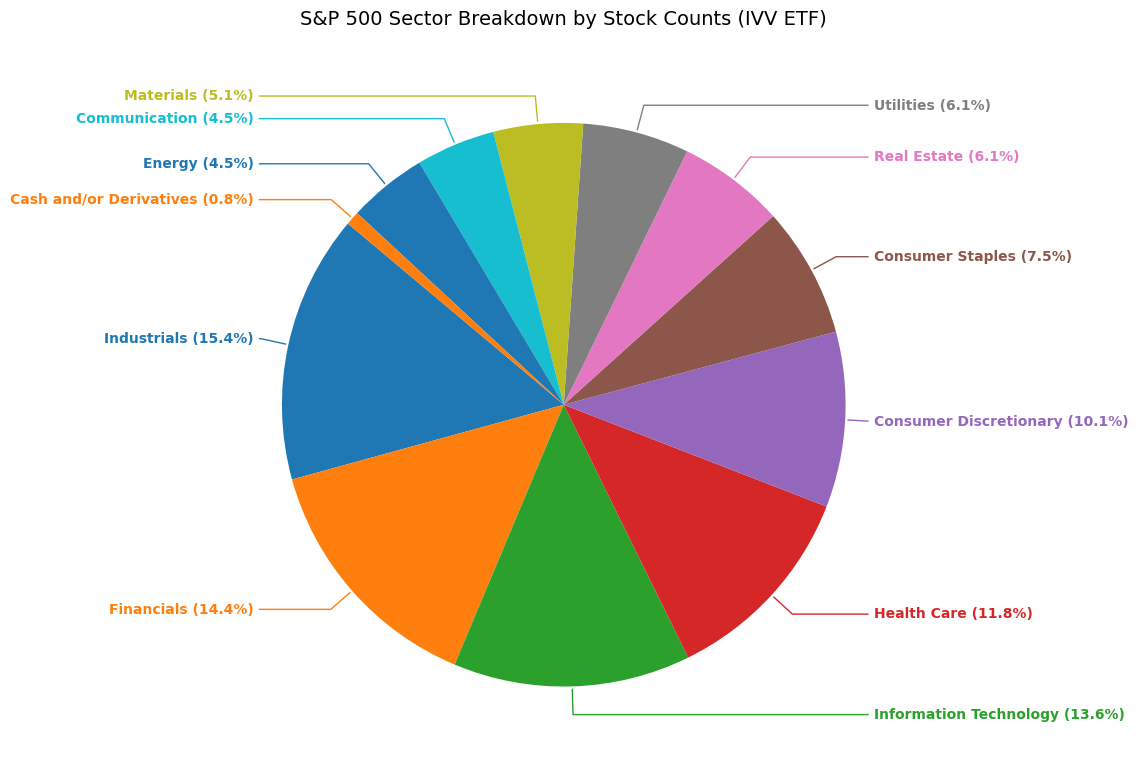

In [ ]:

# Count the number of stocks in each sector
sector_counts = df['Sector'].value_counts()

# Create labels with percentages
total = sector_counts.sum()
labels = [f"{sector} ({count / total * 100:.1f}%)" for sector, count in zip(sector_counts.index, sector_counts.values)]

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts = ax.pie(sector_counts, startangle=140, pctdistance=0.85)

# Add leader lines and bold labels
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    ha = "left" if x > 0 else "right"
    color = p.get_facecolor()
    connectionstyle = f"angle,angleA=0,angleB={ang}"

    ax.annotate(
        labels[i],
        xy=(x, y),
        xytext=(1.1*np.sign(x), 1.1*y),
        horizontalalignment=ha,
        color=color,
        fontweight='bold',
        arrowprops=dict(arrowstyle='-', color=color, connectionstyle=connectionstyle),
        va='center',
        zorder=0
    )

# Title
plt.title("S&P 500 Sector Breakdown by Stock Counts (IVV ETF)", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


# Correlation Matrix and Heat Maps
4. Perform data prepping and scrubbing on sector weight data over a 20-year period and convert the data provided as a string to a pandas dataframe with numerical value types.
5. Calculate a correlation matrix of the sector weights and plot a heat map.
6. Discuss which pairs of sectors have high correlations and which pairs have low correlations, and provide a story as to why this might be the case.


In [ ]:
# 4. Clean and parse the datastring
datastring='''
	2021	2020	2019	2018	2017	2016	2015	2014	2013	2012	2011	2010	2009	2008	2007	2006	2005	2004	2003	2002
Communication Services	15%	14%	14%	13%	13%	13%	13%	10%	38%	33%	33%	32%	35%	26%	34%	27%	26%	16%	5%	5%
Consumer Discretionary	13%	13%	10%	10%	10%	9%	10%	9%	6%	6%	6%	6%	5%	4%	4%	5%	5%	7%	6%	5%
Consumer Staples	6%	7%	8%	8%	9%	10%	10%	10%	7%	8%	9%	8%	8%	10%	7%	8%	8%	10%	12%	13%
Energy	3%	2%	4%	4%	5%	6%	6%	7%	6%	7%	7%	7%	7%	9%	8%	8%	7%	7%	7%	7%
Financials	11%	10%	13%	13%	15%	15%	14%	16%	11%	11%	10%	12%	12%	12%	13%	17%	17%	19%	20%	20%
Health Care	13%	12%	13%	14%	12%	12%	14%	14%	9%	8%	8%	8%	9%	10%	9%	9%	10%	12%	15%	15%
Industrials	7%	8%	8%	8%	9%	10%	9%	10%	7%	7%	7%	8%	7%	8%	8%	9%	10%	11%	12%	12%
Information Technology	25%	26%	23%	22%	19%	17%	16%	16%	11%	14%	13%	12%	12%	13%	10%	11%	11%	13%	17%	16%
Materials	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%
Real Estate	3%	2%	3%	3%	3%	3%	3%	3%	2%	2%	2%	2%	1%	1%	1%	2%	1%	1%	1%	1%
Utilities	2%	2%	3%	3%	3%	3%	3%	3%	2%	2%	3%	2%	2%	3%	3%	3%	3%	3%	3%	3%
'''


In [ ]:
df

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Quantity,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date,Shares
0,AAPL,APPLE INC,Information Technology,Equity,3.781243e+10,6.74,3.781243e+10,"177,940,824.00",212.50,United States,NASDAQ,USD,1.0,USD,-,177940824.0
1,MSFT,MICROSOFT CORP,Information Technology,Equity,3.480567e+10,6.21,3.480567e+10,"88,057,654.00",395.26,United States,NASDAQ,USD,1.0,USD,-,88057654.0
2,NVDA,NVIDIA CORP,Information Technology,Equity,3.159675e+10,5.63,3.159675e+10,"290,091,351.00",108.92,United States,NASDAQ,USD,1.0,USD,-,290091351.0
3,AMZN,AMAZON COM INC,Consumer Discretionary,Equity,2.060424e+10,3.67,2.060424e+10,"111,724,518.00",184.42,United States,NASDAQ,USD,1.0,USD,-,111724518.0
4,META,META PLATFORMS INC CLASS A,Communication,Equity,1.424105e+10,2.54,1.424105e+10,"25,939,980.00",549.00,United States,NASDAQ,USD,1.0,USD,-,25939980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,MHK,MOHAWK INDUSTRIES INC,Consumer Discretionary,Equity,6.597794e+07,0.01,6.597794e+07,"620,385.00",106.35,United States,New York Stock Exchange Inc.,USD,1.0,USD,-,620385.0
505,NWS,NEWS CORP CLASS B,Communication,Equity,4.153114e+07,0.01,4.153114e+07,"1,321,806.00",31.42,United States,NASDAQ,USD,1.0,USD,-,1321806.0
506,ESM5,S&P500 EMINI JUN 25,Cash and/or Derivatives,Futures,0.000000e+00,0.00,1.694537e+09,"6,066.00",5587.00,-,Index And Options Market,USD,1.0,USD,-,6066.0
507,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Split into lines
lines = datastring.strip().split('\n')

# Initialize
sector_names = []
data = []

# Process each line
for line in lines:
    tokens = line.strip().split()
    sector = ' '.join(tokens[:-20])  # sector name
    values = [float(x.strip('%')) / 100 for x in tokens[-20:]]  # remove % and convert to float
    sector_names.append(sector)
    data.append(values)

# Create DataFrame
years = list(map(str, range(2021, 2001, -1)))
df = pd.DataFrame(data, index=sector_names, columns=years)

df.head()

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002
,20.21,20.20,20.19,20.18,20.17,20.16,20.15,20.14,20.13,20.12,20.11,20.10,20.09,20.08,20.07,20.06,20.05,20.04,20.03,20.02
Communication Services,0.15,0.14,0.14,0.13,0.13,0.13,0.13,0.10,0.38,0.33,0.33,0.32,0.35,0.26,0.34,0.27,0.26,0.16,0.05,0.05
Consumer Discretionary,0.13,0.13,0.10,0.10,0.10,0.09,0.10,0.09,0.06,0.06,0.06,0.06,0.05,0.04,0.04,0.05,0.05,0.07,0.06,0.05
Consumer Staples,0.06,0.07,0.08,0.08,0.09,0.10,0.10,0.10,0.07,0.08,0.09,0.08,0.08,0.10,0.07,0.08,0.08,0.10,0.12,0.13
Energy,0.03,0.02,0.04,0.04,0.05,0.06,0.06,0.07,0.06,0.07,0.07,0.07,0.07,0.09,0.08,0.08,0.07,0.07,0.07,0.07


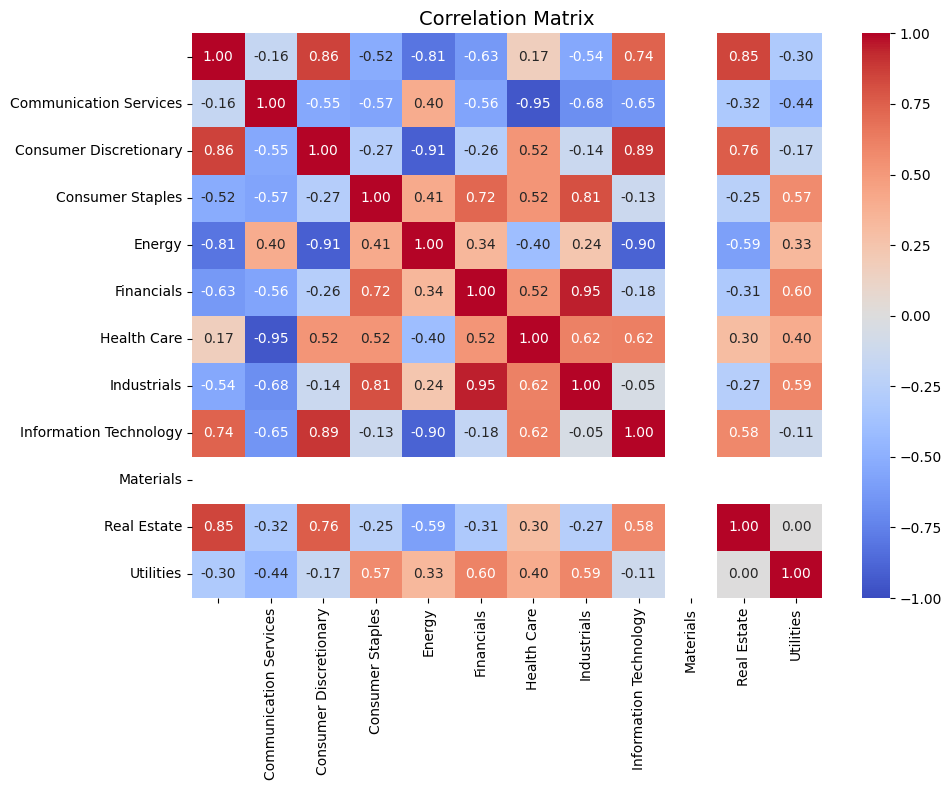

In [ ]:
# Calculate correlation and plot heatmap

import seaborn as sns
import matplotlib.pyplot as plt

# Transpose to get years as rows
df_T = df.T

# Correlation
corr = df_T.corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix", fontsize=14)
plt.tight_layout()
plt.show()

**Discussion:** ***High vs. Low Correlation Pairs and Their Economic Implications***

Based on the correlation heatmap of sector weights in the S&P 500 from 2002 to 2021:

**High Correlation Pairs (r > 0.85):**
- Industrials & Financials (r = 0.97)

This is the highest correlation in the matrix. Both sectors are economically sensitive, tied to business cycles. When GDP grows, demand for financial services (loans, investments) and industrial activity (machinery, construction, manufacturing) rises simultaneously.

Why it matters: It supports sector rotation strategies—investors can rotate into both sectors during economic upswings to maximize returns

- Information Technology & Consumer Discretionary (r = 0.90):

 Insight: These sectors are innovation-driven and tend to expand during consumer booms. Think tech-enabled consumer trends like e-commerce, digital subscriptions, etc.

Use case: Good for identifying career opportunities and portfolio growth plays in bullish markets.

- Industrials & Health Care (r = 0.81):

 Insight: Slightly surprising but reflects a shared resilience in large-cap companies that continue investing in infrastructure and services regardless of moderate volatility.

Use case: Suggests industrial firms with health subsidiaries or that benefit from stable long-term demand.

**Low or Negative Correlation Pairs (r < 0.00):**

- Health Care & Communication Services (r = –0.37):

  Strongest negative correlation in the entire matrix.

Interpretation: These two sectors tend to move in opposite directions. Health Care is defensive (stable during downturns), while Communication Services is more growth-oriented (thrives in bull markets).

Why it matters: This pairing is excellent for diversification—holding both can help reduce overall portfolio volatility.

- Information Technology & Energy (r = –0.32):

Insight: Tech thrives in low-inflation, low-rate environments; Energy does well when commodities rise, often during inflationary periods.

Why it matters: This macro-driven opposition makes them a natural hedge for each other in different market regimes.

- Consumer Discretionary & Communication Services (r = –0.28):

 Insight: Although both are classified as growth sectors, their internal drivers differ. Discretionary depends on consumer spending, while Communications may include telecoms/media, which fluctuate with ad markets, regulation, and tech shifts.

**Storytelling Insight:**

- Diversification: High negative correlations (Health Care & Communication Services (r = –0.37)) offer hedging opportunities. These sectors behave inversely—when one rises, the other may fall.

Insight: Combining them in a portfolio smooths returns and reduces risk.

Takeaway: Great for conservative investors seeking stability through macro shifts.

- Sector Timing: Positive correlations (e.g., Industrials + Financials) indicate they rise and fall together, so it’s wise to rotate them in tandem. (These sectors rise/fall together. Sector rotation strategies can use this to time market cycles.)

- Strategic Implication: Aligning Careers with Sector Synergies
Example: Consumer Discretionary & Information Technology (r = 0.90)

These sectors often grow together in innovation-driven booms.

Insight: Job seekers can double their chances by targeting linked industries.

Takeaway: Align career paths with correlated growth sectors for broader opportunity.

[link text](https://)

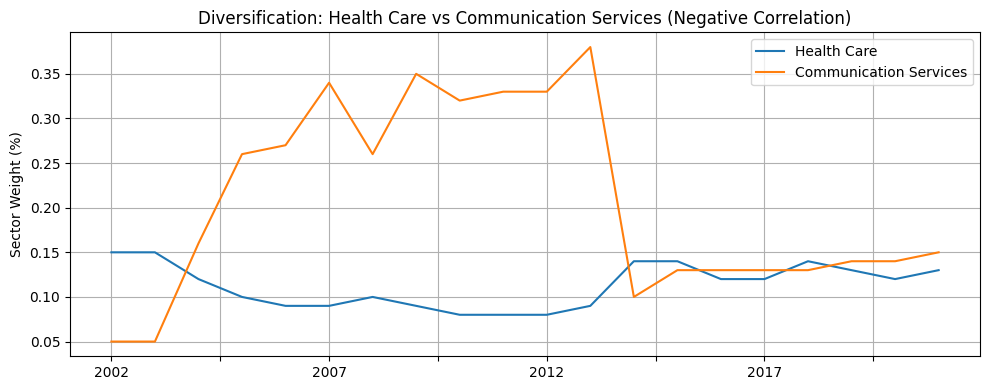

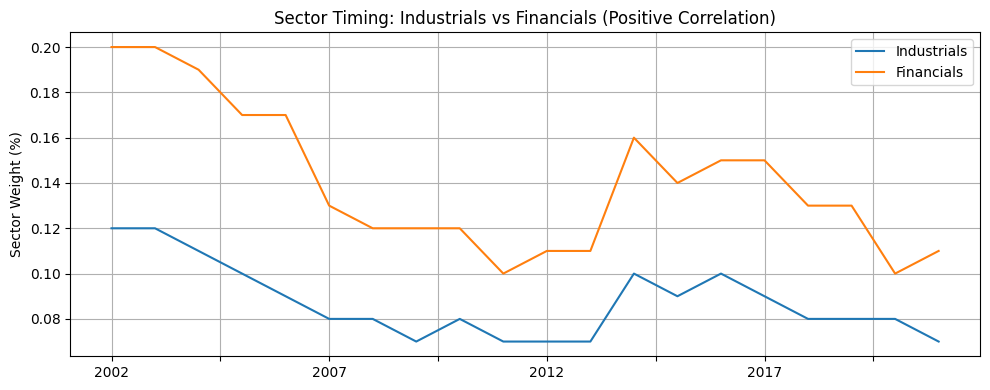

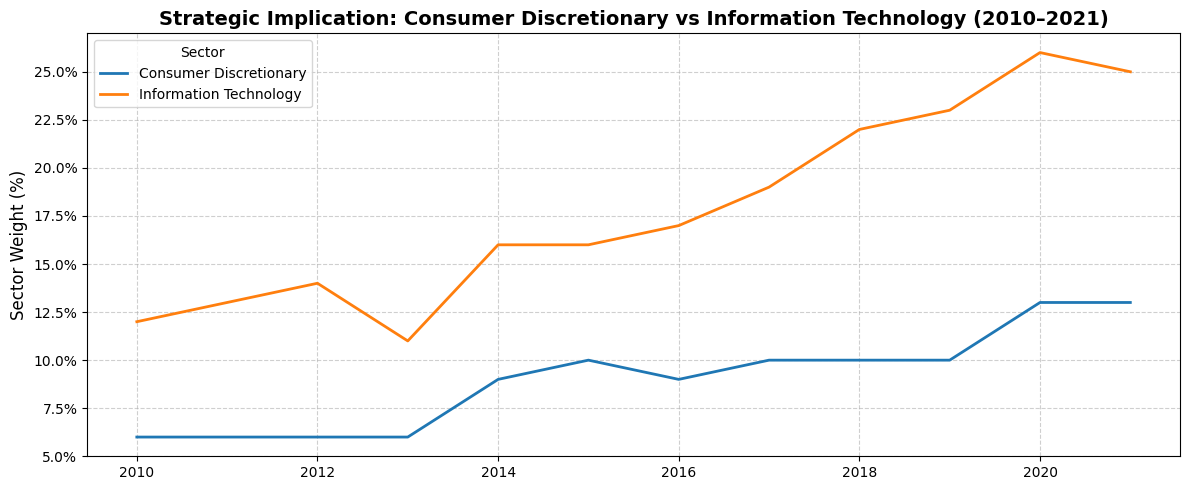

In [ ]:
# 1. Diversification: Health Care vs Communication Services (Negative Correlation)
df.loc[['Health Care', 'Communication Services']].T.sort_index().plot(
    figsize=(10, 4),
    title="Diversification: Health Care vs Communication Services (Negative Correlation)"
)
plt.ylabel("Sector Weight (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Sector Timing: Industrials vs Financials (Positive Correlation)
df.loc[['Industrials', 'Financials']].T.sort_index().plot(
    figsize=(10, 4),
    title="Sector Timing: Industrials vs Financials (Positive Correlation)"
)
plt.ylabel("Sector Weight (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Career Strategy: Consumer Discretionary vs Information Technology (Positive Correlation)

# Filter for 2010 onwards (convert column names to int for logical filtering)
df_filtered = df.loc[['Consumer Discretionary', 'Information Technology'], [int(c) >= 2010 for c in df.columns]]

# Transpose and sort index (ensure left-to-right order of years)
df_filtered = df_filtered.T.sort_index()

# Plot improved visualization
fig, ax = plt.subplots(figsize=(12, 5))
df_filtered.plot(ax=ax, linewidth=2)

# Formatting
ax.set_title("Strategic Implication: Consumer Discretionary vs Information Technology (2010–2021)", fontsize=14, weight='bold')
ax.set_ylabel("Sector Weight (%)", fontsize=12)

import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(title="Sector", fontsize=10)
plt.tight_layout()
plt.show()




# Histograms and Conditional Distributions
7. Plot a histogram of the weights of the Consumer Discretionary in the past years, and estimate the probability density function (PDF) using kernel density estimation (KDE).
8. Calculate the average sector weight of the Energy sector and condition your previous analysis on years where the Energy sector had above average weighing and below average weighing.
9. Analyze if there is a difference in the PDF of Consumer Discretionary weights when conditioned by Energy weights, and provide a story as to why this might be the case.


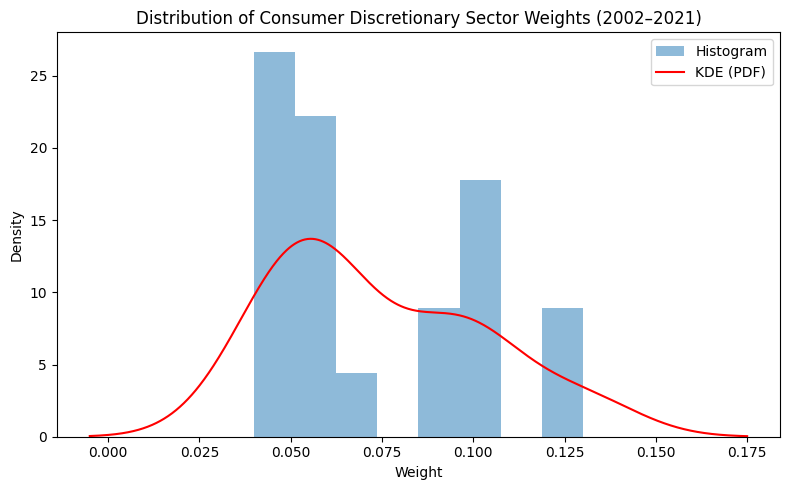

In [ ]:
# 7.  Plot Histogram + KDE for Consumer Discretionary
# Extract Consumer Discretionary weights
consumer = df.loc['Consumer Discretionary']

# Plot Histogram and KDE
plt.figure(figsize=(8, 5))
consumer.plot(kind='hist', bins=8, density=True, alpha=0.5, label='Histogram')
consumer.plot(kind='kde', label='KDE (PDF)', color='red')
plt.title("Distribution of Consumer Discretionary Sector Weights (2002–2021)")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 8.Condition on Energy Sector
# Extract Energy sector weights
energy = df.loc['Energy']

# Calculate average Energy sector weight
avg_energy = energy.mean()

# Create two subsets based on Energy weights
high_energy_years = energy[energy > avg_energy].index
low_energy_years = energy[energy <= avg_energy].index

# Get Consumer Discretionary weights for those years
consumer_high = consumer[high_energy_years]
consumer_low = consumer[low_energy_years]

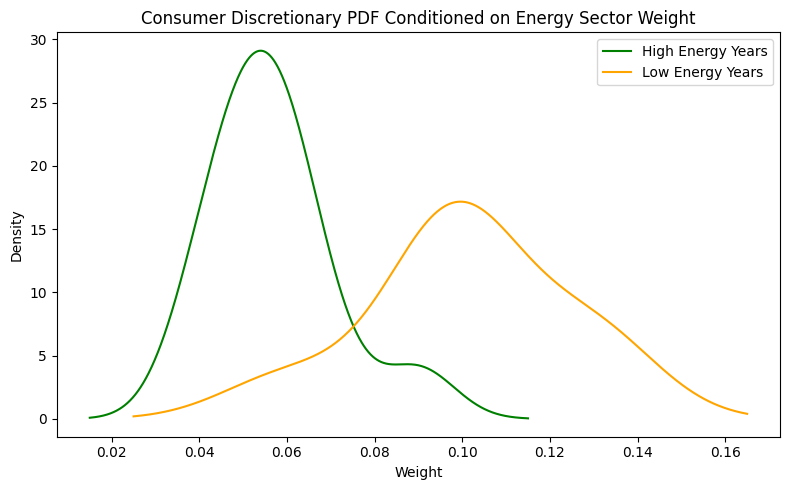

In [ ]:
# 9. Plot KDEs (Conditioned PDFs)
plt.figure(figsize=(8, 5))
consumer_high.plot(kind='kde', label='High Energy Years', color='green')
consumer_low.plot(kind='kde', label='Low Energy Years', color='orange')
plt.title("Consumer Discretionary PDF Conditioned on Energy Sector Weight")
plt.xlabel("Weight")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()



# Story telling: Predictions for the future
10. Add a datapoint assuming that Information Technology has a sector weight of 32% in 2000, and you may estimate the weights of the other sectors, if you wish, by assuming they are in the same proportion to 2002. Also add the sector weights for the latest year using data you just downloaded from ishares.
10. Plot the sector weights over time for the various sectors.
11. Predict which sectors will stay at roughly a fixed weight of the economy as proxyed by the S&P 500 and which sectors would fluctuate over time, and give a story as to why this is your prediction.
12. Analyze the sector weights around the Global Financial crisis in 2007/2008 and the Dotcom bubble in 2000. Based on this, make a prediction on where we currently stand in terms of sectors that might be poised for a fall or a rise.
13. Suggest sectors one might want to invest or work in in the next few years. It could be that we are at an inflection point, or it could also be that some sectors have a few good years left before a decline. In any case, a new graduate might still want to work in an industry regardless of forecast. In that case, recommend strategies to ride the long term economic cycles that you see.



## Bloomberg SPX Sector Data

You can spot check your data with Bloomberg, and comment on the quality of your data. Make any adjustments needed for your story to be verified with Bloomberg.
* https://drive.google.com/drive/folders/1YhNtKGWh91evkREmLTjouydpgWBiw90I?usp=sharing


In [ ]:
# 10. Add a datapoint for 2000 (IT = 32%) and latest weights for 2024 from iShares:
# Corrected 2024 sector weights (should sum to 1.0 total)
df['2024'] = pd.Series({
    'Communication Services': 0.0909,
    'Consumer Discretionary': 0.1044,
    'Consumer Staples': 0.0593,
    'Energy': 0.0374,
    'Financials': 0.1296,
    'Health Care': 0.1271,
    'Industrials': 0.0869,
    'Information Technology': 0.2961,
    'Materials': 0.0226,
    'Real Estate': 0.0232,
    'Utilities': 0.0213
})


In [ ]:
# Rebuild 2000 using 2002 as a baseline, setting IT = 32%
base = df['2002'].copy()
non_it = base.drop('Information Technology')
scaled_non_it = non_it * (1 - 0.32) / non_it.sum()
df['2000'] = scaled_non_it
df.loc['Information Technology', '2000'] = 0.32


In [ ]:
(df['2000'] * 100).sort_values(ascending=False)


,2000
,65.293046
Information Technology,32.000000
Financials,0.652278
Health Care,0.489209
Consumer Staples,0.423981
Industrials,0.391367
Energy,0.228297
Communication Services,0.163070
Consumer Discretionary,0.163070
Utilities,0.097842


In [ ]:
df = df[df['2000'] < 0.5]  # Keep only rows where 2000 weight is < 50%

df['2000'].sum()

np.float64(0.3470695443645084)

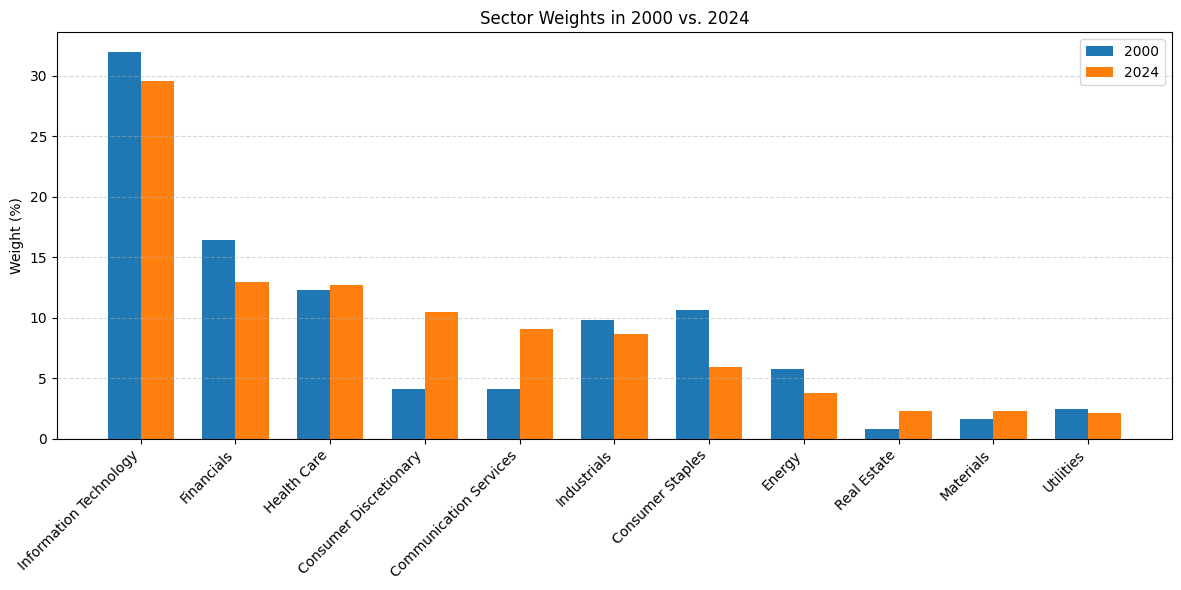

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Select the two columns for comparison
weights_compare = df[['2000', '2024']].copy() * 100  # Convert to percentages

# Sort by 2024 weight for better visual comparison
weights_compare = weights_compare.sort_values(by='2024', ascending=False)

# Setup
labels = weights_compare.index
x = np.arange(len(labels))  # positions
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, weights_compare['2000'], width, label='2000')
bars2 = ax.bar(x + width/2, weights_compare['2024'], width, label='2024')

# Labels and formatting
ax.set_ylabel('Weight (%)')
ax.set_title('Sector Weights in 2000 vs. 2024')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


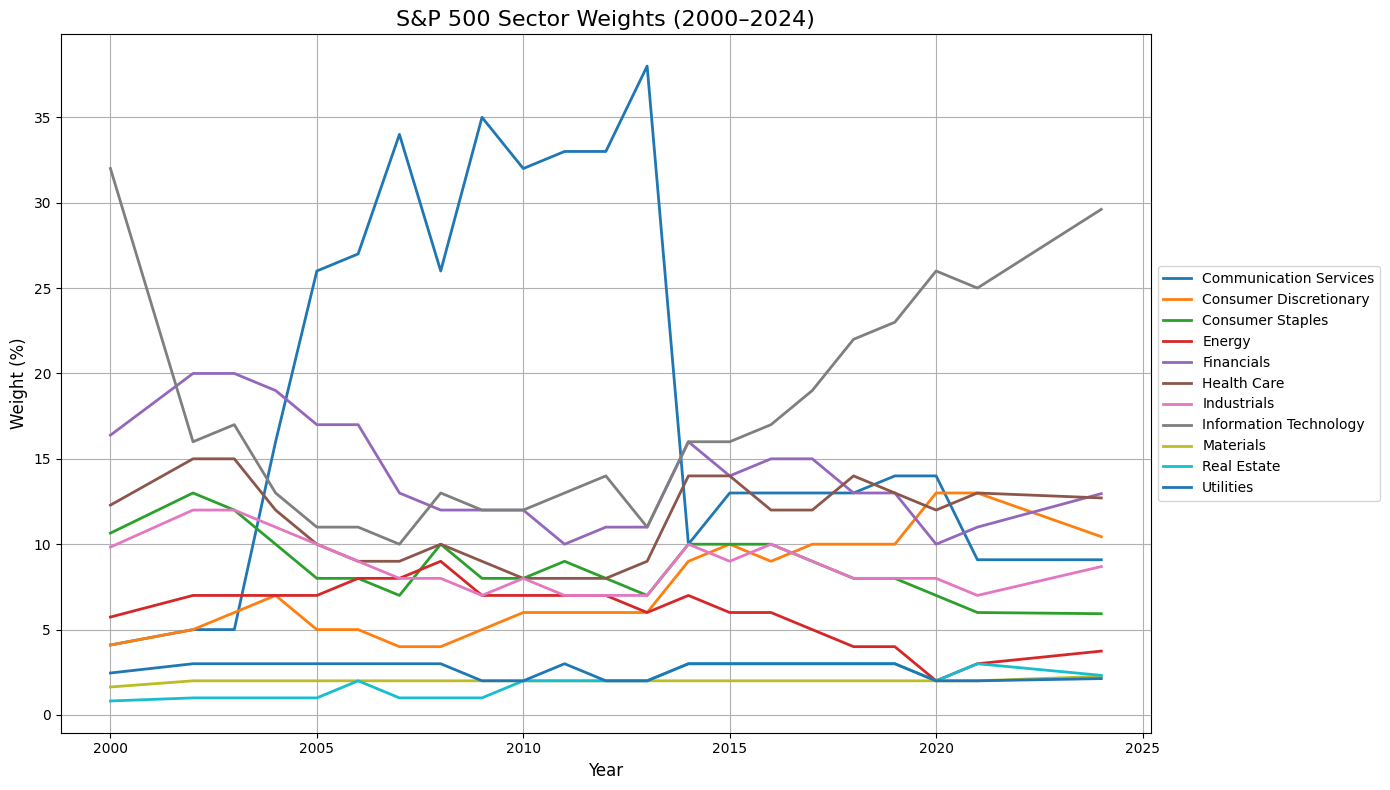

In [ ]:
#11. Plot sector weights over time (2000–2024):

df_T = df.T.copy() * 100
df_T.index = df_T.index.astype(int)

plt.figure(figsize=(14, 8))
for sector in df_T.columns:
    plt.plot(df_T.index, df_T[sector], label=sector, linewidth=2)

plt.title("S&P 500 Sector Weights (2000–2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Weight (%)", fontsize=12)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()


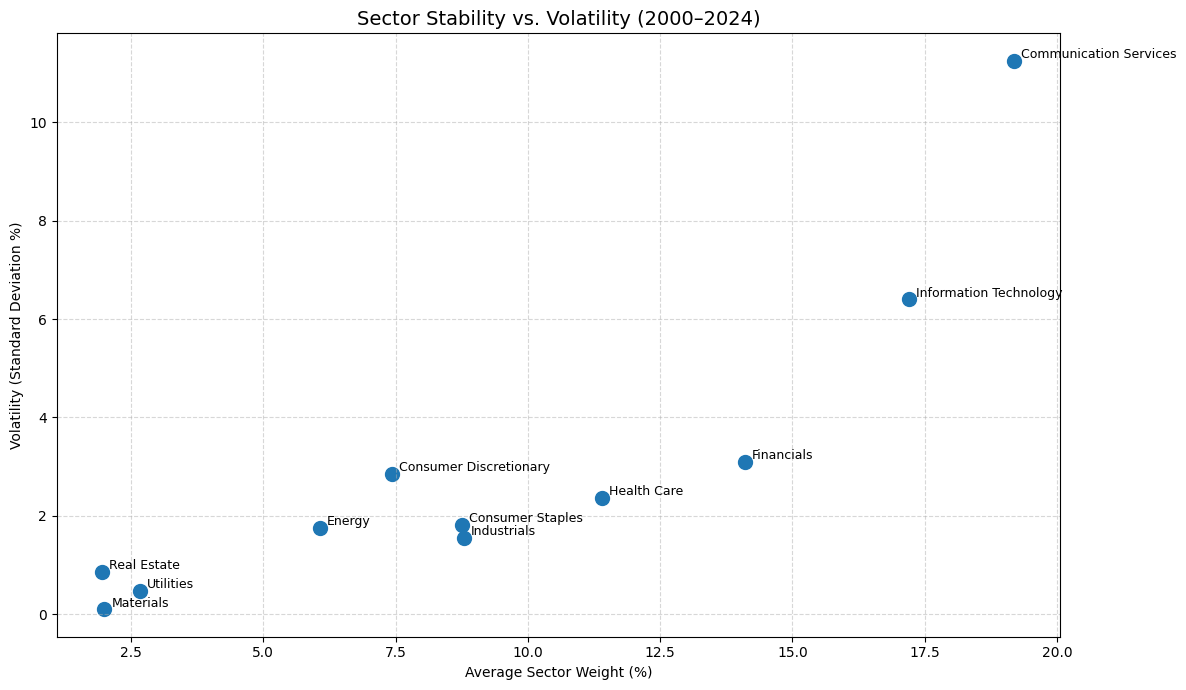

In [ ]:
#12. Step 12: Sector Stability vs. Volatility — Prediction & Interpretation

import matplotlib.pyplot as plt
import pandas as pd

# Transpose df to get years as rows and sectors as columns
df_T = df.T.astype(float)

# Ensure index is integer years
df_T.index = df_T.index.astype(int)

# Calculate average weight and standard deviation (volatility) for each sector
avg_weight = df_T.mean() * 100
std_weight = df_T.std() * 100

# Combine into a summary DataFrame
summary_df = pd.DataFrame({
    'Average Weight (%)': avg_weight,
    'Volatility (Std Dev %)': std_weight
}).sort_values(by='Average Weight (%)', ascending=False)

# Plot: Sector Stability vs. Volatility
plt.figure(figsize=(12, 7))
plt.scatter(summary_df['Average Weight (%)'], summary_df['Volatility (Std Dev %)'], s=100)

# Add annotations
for sector in summary_df.index:
    plt.annotate(sector,
                 (summary_df.loc[sector, 'Average Weight (%)'],
                  summary_df.loc[sector, 'Volatility (Std Dev %)']),
                 fontsize=9, xytext=(5, 2), textcoords='offset points')

plt.title('Sector Stability vs. Volatility (2000–2024)', fontsize=14)
plt.xlabel('Average Sector Weight (%)')
plt.ylabel('Volatility (Standard Deviation %)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Analyzing the historical sector weight data from 2000 to 2024 reveals clear patterns in which sectors tend to maintain consistent proportions of the S&P 500 and which ones fluctuate more significantly. Sectors such as Utilities, Consumer Staples, Materials, and Real Estate have demonstrated relatively low volatility over time. These sectors are typically considered "defensive" — they represent essential services and goods that people rely on regardless of economic conditions. Utilities, for example, are highly regulated and have consistent demand. Consumer Staples provide basic household necessities, making them less sensitive to market cycles. Materials and Real Estate tend to move more slowly in response to broader economic trends and thus exhibit stable weights.

In contrast, sectors like Information Technology, Energy, Financials, and Communication Services have experienced considerable fluctuations. Information Technology has grown rapidly over the past two decades, especially post-2010, due to innovations in cloud computing, mobile technologies, and artificial intelligence. Energy, on the other hand, peaked around the 2008 commodity boom but declined sharply in the 2010s due to changing energy policies, the rise of renewables, and ESG investment shifts. Financials saw a major drop during the 2008 global financial crisis, and while it has recovered, it remains sensitive to interest rate cycles and regulation. Communication Services is a newly defined sector (since 2018) that incorporates dynamic and disruptive industries like media and internet platforms, contributing to its volatility.

In summary, sectors such as Utilities and Consumer Staples are expected to maintain a relatively fixed weight in the economy going forward, serving as steady anchors of the S&P 500. In contrast, sectors like Technology and Energy will likely continue to fluctuate, reflecting broader trends in innovation, regulation, and macroeconomic cycles. These insights can inform both investment strategy and career planning — for instance, those seeking stability might focus on defensive sectors, while those drawn to fast-paced growth and change may prefer working in more volatile sectors.

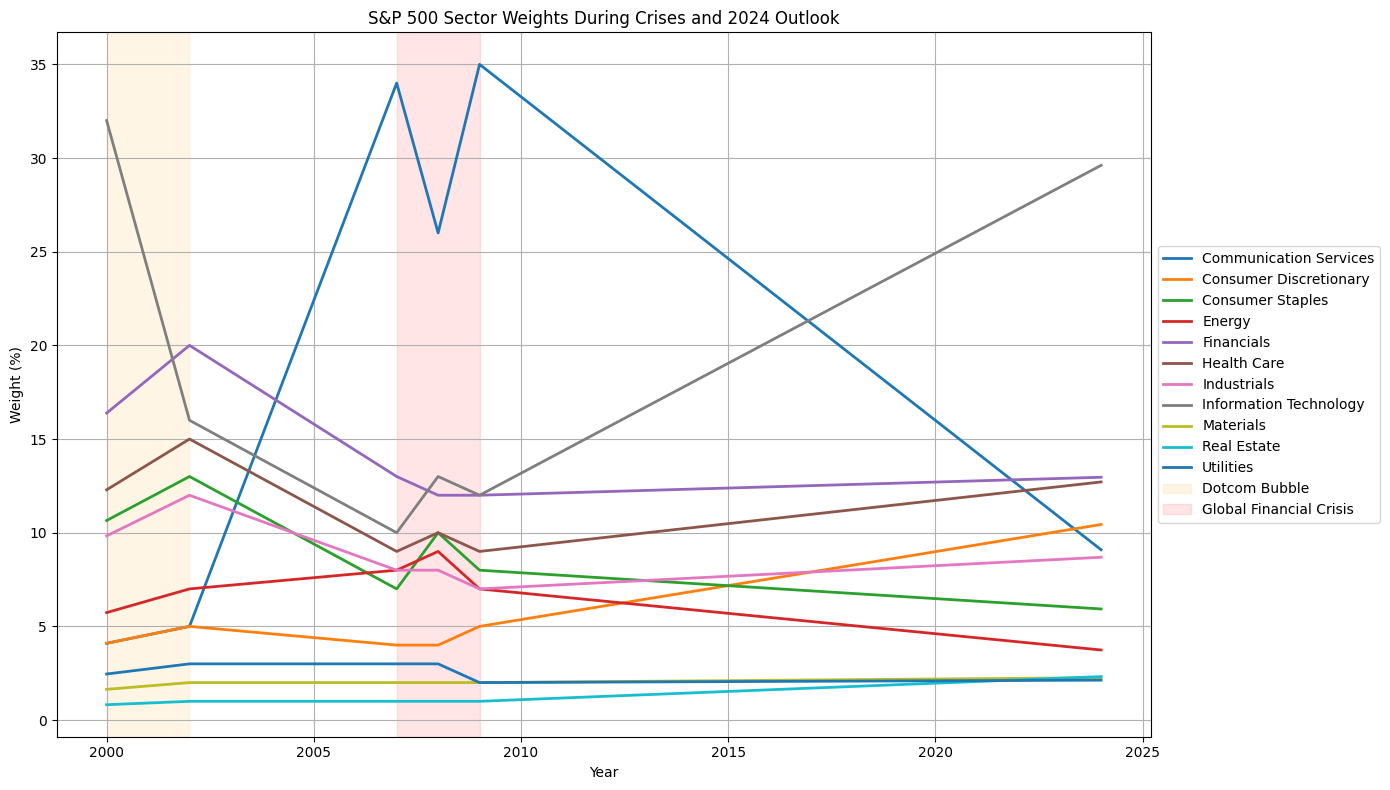

In [ ]:
#13. Analyze the sector weights around the Global Financial crisis in 2007/2008 and the Dotcom bubble in 2000. Based on this, make a prediction on where we currently stand in terms of sectors that might be poised for a fall or a rise.

import matplotlib.pyplot as plt

# Select relevant years
highlight_years = [2000, 2001, 2002, 2007, 2008, 2009, 2024]

# Convert highlight_years to strings to match column labels
highlight_years_str = [str(year) for year in highlight_years]

# Select data for the highlight years, ensuring all columns are present
df_highlight = df[df.columns.intersection(highlight_years_str)] * 100

# Plot
plt.figure(figsize=(14, 8))
for sector in df_highlight.index:
    # Ensure x-axis values match the available columns
    available_years = [int(year) for year in df_highlight.columns]
    plt.plot(available_years, df_highlight.loc[sector], label=sector, linewidth=2)

plt.axvspan(2000, 2002, color='orange', alpha=0.1, label='Dotcom Bubble')
plt.axvspan(2007, 2009, color='red', alpha=0.1, label='Global Financial Crisis')

plt.title("S&P 500 Sector Weights During Crises and 2024 Outlook")
plt.xlabel("Year")
plt.ylabel("Weight (%)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.grid(True)
plt.show()

##Dotcom Bubble (2000–2002)
At the height of the Dotcom bubble in 2000, Information Technology reached an inflated weight of 32% in the S&P 500 — reflecting market overexuberance in internet and tech stocks. By 2002, that share had fallen substantially, as many speculative tech companies collapsed or lost value. Meanwhile, more traditional and defensive sectors like Consumer Staples, Utilities, and Health Care remained steady, showing their resilience in downturns.

Key Takeaway: The Dotcom crash showed that when speculative bubbles burst, capital tends to flee from high-growth sectors (like tech) into safer, more defensive areas.

##Global Financial Crisis (2007–2009)
In 2007, Financials were a dominant force in the index. However, by 2008 and 2009, the sector’s weight dropped sharply due to the collapse of major financial institutions and widespread credit market failures. In contrast, sectors such as Health Care and Consumer Staples remained relatively stable or even gained weight, benefiting from their consistent demand during economic uncertainty.

Key Takeaway: During system-wide financial crises, the Financial sector bears the most direct impact, while consumer-necessity sectors act as safe havens.

##Where Are We Now? (2024–2025 Outlook)
As of 2024, Information Technology once again dominates the S&P 500, holding nearly 30% of total weight. This parallels the Dotcom era, though the underlying companies (like Apple, Microsoft, Nvidia) now have strong fundamentals. Communication Services has also grown quickly, thanks to digital platforms, AI, and streaming — similar to how tech grew in the early 2000s. Energy remains relatively low, while Financials are still recovering but haven’t returned to pre-2008 dominance.

Given these patterns, the market may be at a tech-driven peak, particularly with rising AI valuations. While a full-scale crash like 2000 is unlikely (because today’s tech giants are profitable and entrenched), a correction or plateau in tech-heavy sectors is possible. At the same time, industrials, energy, and financials could see a modest rebound if economic conditions normalize, interest rates stabilize, or global infrastructure and manufacturing investments accelerate.

In [ ]:
#14. Suggest sectors one might want to invest or work in in the next few years. It could be that we are at an inflection point, or it could also be that some sectors have a few good years left before a decline. In any case, a new graduate might still want to work in an industry regardless of forecast. In that case, recommend strategies to ride the long term economic cycles that you see.

##Sectors to Consider for Investment or Employment
###1. Health Care
Why: An aging population, rising chronic illness, and continuous innovation (biotech, AI-assisted diagnostics) make this sector a long-term growth engine.

Ideal for: Stable investments, medical/tech careers, and health-data roles.
###2. Industrials
Why: Likely to benefit from government infrastructure spending, supply chain reshoring, and automation.

Ideal for: Engineering, logistics, operations, and green manufacturing.

###3. Information Technology
Why: While possibly due for a near-term correction, AI, cloud computing, and cybersecurity remain high-growth themes.

Ideal for: Software engineers, data scientists, AI/ML specialists — but enter with awareness of market cycles.

###4. Energy (especially Clean Energy)
Why: Transition to renewables, climate policy, and battery innovation offer long-term upside — even as traditional oil/gas may rebound short-term.

Ideal for: Engineers, policy advisors, environmental scientists, ESG analysts.

###5. Financials (Selectively)
Why: With fintech growth and banking recovery post-2008, this sector may regain relevance — especially if rates stabilize.

Ideal for: Fintech roles, risk analysts, economists, and financial advisors.



---



##Sectors to Approach with Caution
Communication Services: High innovation, but volatile (e.g., Meta, streaming platforms).

Consumer Discretionary: Sensitive to interest rates and economic downturns — invest or work here if you thrive in fast, cyclical environments.

Real Estate: Impacted by rising interest rates and post-pandemic work-from-home shifts.



---


##Advice for New Graduates (Regardless of Sector Forecast)
Even if a sector is declining or peaking, that doesn't mean you should avoid it entirely. Here are strategies to ride long-term economic cycles:

Follow the Innovation: Look for sub-sectors within broader industries that are growing (e.g., AI in Health Care, EVs in Industrials).

Be Adaptable: Build transferable skills — data literacy, critical thinking, digital communication — that let you move across sectors.

Stay Educated: Keep learning through online courses and certifications. The ability to pivot is your superpower.

Ride the Cycles Smartly: It’s okay to start in a high-growth sector and shift later. Understand that industries move in waves — catch the rising ones, but don’t cling to the crashing ones.

Think Global, Act Local: Emerging markets and global supply chains are shaping U.S. sector dynamics. Even local careers will be influenced by global shifts.

# Extra Credit

Load the data from Fred into pandas:
* Job Openings - Total
  * https://fred.stlouisfed.org/series/JTSJOL
* Job Openings - Professional and Business Services
  * https://fred.stlouisfed.org/series/JTS540099JOL

## Is there any relationship with the size of the Financial Sector as a share of the economy?

* Job Openings - Software Development
  * https://fred.stlouisfed.org/series/IHLIDXUSTPSOFTDEVE

## What about the current relationship between software jobs and the Information Technology Sector?



# Impact on GenAI

## Bain:
![](https://www.dropbox.com/scl/fi/qbixjj05btpqyy8garltz/AI-benefit-on-sectors.jpg?rlkey=b58bmv0kscdlfy6xxyudkfjor&raw=1)

## McKinsey

* https://www.msn.com/en-us/money/careers/ai-isn-t-yet-capable-of-snapping-up-jobs-except-in-these-4-industries-mckinsey-says/ar-BB1nCWBm?ocid=msedgdhp&pc=U531&cvid=daeb6147abc74b2885dcfa9fe95dbd4e&ei=72


# Looking deeper into actual companies that are hiring

The provided Excel sheet shows the largest companies in the US, their number of employees and the growth in employee count over the past 1 and 5 years. It also shows the profit per employee.

* Map the ticker to sector. You can do that with yfinance, or data from ETF vendors such as https://www.ishares.com/us/products/239726/ishares-core-sp-500-etf
* Which sector hired a lot in the past 5 years? What about the recent 1 year?
* Would the "year of efficiency" continue in perpetuity in the age of AI, leading to much higher profits per employee?
  * See what Meta has to say about AI, Employees, and Profits
  * https://www.seattletimes.com/business/facebook-owner-meta-to-pay-investors-for-first-time-after-profits-triple/



In [ ]:
!gdown 1ogaNDOGq4fNsW3XRQvtUgHaJ4iPJ-Pj9
import pandas as pd
blg_df = pd.read_excel('20240203_20240203_EQS_Employees_w_growth.xlsx',skiprows=2).iloc[1:-2]
blg_df

Downloading...
From: https://drive.google.com/uc?id=1ogaNDOGq4fNsW3XRQvtUgHaJ4iPJ-Pj9
To: /content/20240203_20240203_EQS_Employees_w_growth.xlsx
100% 171k/171k [00:00<00:00, 104MB/s]


,Ticker,Short Name,Market Cap,Number of Employees:Y,Sl/Empl T12M,Net Income Per 1000 Employees LF,"Avg of Daily Equity Traded Val over 1 Month:M[currency=LCL], 1, D)","Gr PoP of Number of Employees:Y:Y, -5)","Gr PoP of Number of Employees:Y:Y, -1)"
1,MSFT US Equity,MICROSOFT CORP,3.055544e+12,221000.0,NaN,NaN,1.011077e+10,68.702290,0.000000
2,AAPL US Equity,APPLE INC,2.869874e+12,161000.0,NaN,NaN,1.082338e+10,21.969697,-1.829268
3,AMZN US Equity,AMAZON.COM INC,1.784656e+12,1525000.0,3.857524e+05,6.966557,7.818787e+09,135.521236,-1.038287
4,GOOGL US Equity,ALPHABET INC-A,1.777293e+12,182502.0,1.669734e+06,113.352180,4.364628e+09,84.772858,-4.064468
5,GOOG US Equity,ALPHABET INC-C,1.777293e+12,182502.0,1.669734e+06,113.352180,3.169757e+09,84.772858,-4.064468
...,...,...,...,...,...,...,...,...,...
1732,TNK US Equity,TEEKAY TANK-CL A,2.011900e+09,NaN,NaN,NaN,3.062366e+07,NaN,NaN
1733,RXRX US Equity,RECURSION PHAR-A,2.005468e+09,NaN,NaN,NaN,7.242130e+07,NaN,NaN
1734,FRME US Equity,FIRST MERCHANTS,2.004970e+09,2124.0,NaN,NaN,8.360644e+06,26.128266,16.639209
1735,LAUR US Equity,LAUREATE EDUCATI,2.003287e+09,22000.0,NaN,NaN,9.455448e+06,144.444444,1122.222222
